# **Importing Libraries**

In [52]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics

# **Dataset**

In [53]:
df=pd.read_csv("/content/heart_2020_cleaned.csv")
display(df)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


# **EDA**

In [54]:
df.corr().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


In [55]:
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
BMI,319795.000000,28.325399,6.356100,12.020000,24.030000,27.340000,31.420000,94.850000
PhysicalHealth,319795.000000,3.371710,7.950850,0.000000,0.000000,0.000000,2.000000,30.000000
MentalHealth,319795.000000,3.898366,7.955235,0.000000,0.000000,0.000000,3.000000,30.000000
SleepTime,319795.000000,7.097075,1.436007,1.000000,6.000000,7.000000,8.000000,24.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [57]:
df.describe(include='all')

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


In [58]:
df.count()

HeartDisease        319795
BMI                 319795
Smoking             319795
AlcoholDrinking     319795
Stroke              319795
PhysicalHealth      319795
MentalHealth        319795
DiffWalking         319795
Sex                 319795
AgeCategory         319795
Race                319795
Diabetic            319795
PhysicalActivity    319795
GenHealth           319795
SleepTime           319795
Asthma              319795
KidneyDisease       319795
SkinCancer          319795
dtype: int64

In [59]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [60]:
df =  df[df.columns].replace({'Yes':1, 'No':0, 'Male':1,'Female':0,'No, borderline diabetes':'0','Yes (during pregnancy)':'1' })
df['Diabetic'] = df['Diabetic'].astype(int)

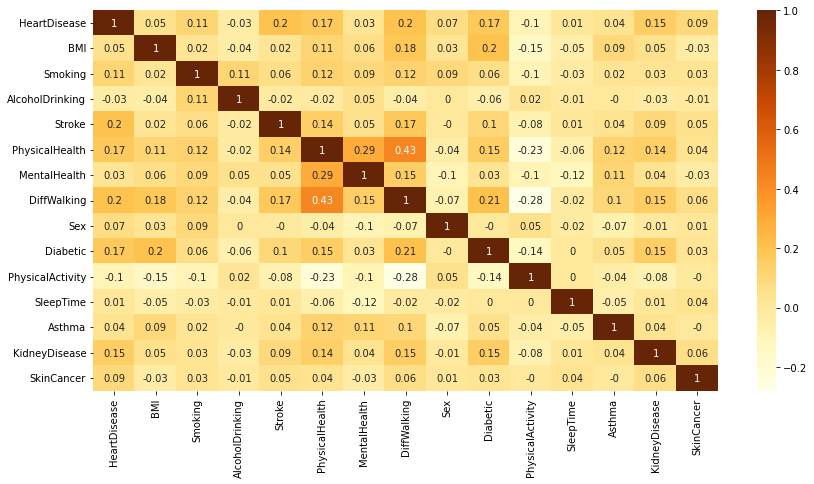

In [61]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

In [62]:
display(df)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60-64,Hispanic,1,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35-39,Hispanic,0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45-49,Hispanic,0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25-29,Hispanic,0,0,Good,12.0,0,0,0


# **Preprocessing**

**Standarization**

In [63]:
from sklearn.preprocessing import StandardScaler 
num_cols = ['MentalHealth', 'BMI', 'PhysicalHealth', 'SleepTime']
Scaler = StandardScaler()
df[num_cols] = Scaler.fit_transform(df[num_cols])

**One Hot Encoding**

In [64]:
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder() 

# Encoding categorical features 
categ = df[['AgeCategory', 'Race', 'GenHealth']]
encoded_categ = pd.DataFrame(enc.fit_transform(categ).toarray())


#Likning the encoed_cateh with the df
df = pd.concat([df, encoded_categ], axis = 1)

In [65]:
# Dropping the categorical features
df = df.drop(columns = ['AgeCategory', 'Race', 'GenHealth'], axis = 1)

In [66]:
display(df)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,14,15,16,17,18,19,20,21,22,23
0,0,-1.844750,1,0,0,-0.046751,3.281069,0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,-1.256338,0,0,1,-0.424070,-0.490039,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,-0.274603,1,0,0,2.091388,3.281069,0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0,-0.647473,0,0,0,-0.424070,-0.490039,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,-0.726138,0,0,0,3.097572,-0.490039,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,-0.144019,1,0,0,0.456341,-0.490039,1,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
319791,0,0.238291,1,0,0,-0.424070,-0.490039,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
319792,0,-0.642753,0,0,0,-0.424070,-0.490039,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
319793,0,0.705560,0,0,0,-0.424070,-0.490039,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# **Grid Search & Finding Best Parameters**

In [67]:
#Select Features
X = df.drop(columns =['HeartDisease'], axis = 1)

#Select Target 
y = df['HeartDisease'].values

print(X.shape)
print(y.shape)
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], 'solver'  : ['newton-cg', 'lbfgs', 'liblinear']}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X,y)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

(319795, 38)
(319795,)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklea

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
accuracy : 0.9159180099751403


In [68]:
print(logreg_cv.best_params_['C'])
print(logreg_cv.best_params_['penalty'])
print(logreg_cv.best_params_['solver'])

0.01
l1
liblinear


# **Test/Train Split**

In [69]:
#Select Features
features = df.drop(columns =['HeartDisease'], axis = 1)

#Select Target 
target = df['HeartDisease']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 44)


print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (255836, 38)
Shape of testing feature: (63959, 38)
Shape of training label: (255836,)
Shape of training label: (63959,)


# **Model Training**

In [70]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(C=logreg_cv.best_params_['C'],penalty=logreg_cv.best_params_['penalty'],solver=logreg_cv.best_params_['solver'],random_state=17, n_jobs=4)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1526: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


# **Evaluation**

In [71]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9160243280851795
Precision: 0.5407166123778502
Recall: 0.09144326110907088


In [72]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)




[[58090   423]
 [ 4948   498]]


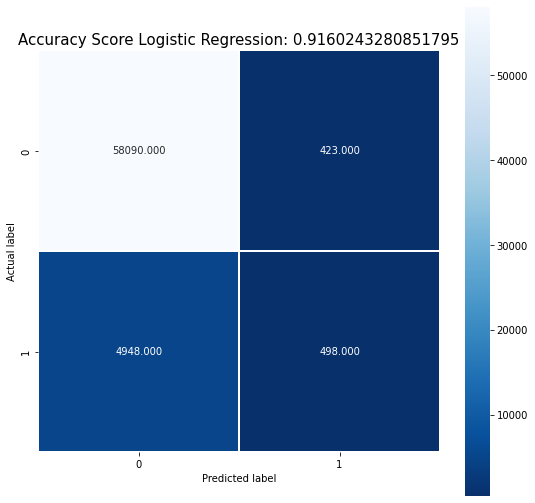

In [73]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score Logistic Regression: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);

https://www.codingem.com/numpy-reshape-minus-one/